<a href="https://colab.research.google.com/github/DEEPIKAKAKARLA/Employee_burnout_prediction/blob/main/Employee_burnout_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the DataFrame:
   employee_id  age   department  years_at_company  avg_work_hours  \
0            1   34        Sales                 5              45   
1            2   28  Engineering                 3              55   
2            3   45           HR                10              40   
3            4   38    Marketing                 7              50   
4            5   29  Engineering                 4              48   

   job_satisfaction  number_of_projects  work_life_balance  \
0                 3                   5                  2   
1                 2                   8                  1   
2                 4                   4                  3   
3                 3                   6                  2   
4                 2                   7                  1   

   mental_health_support  burnout  
0                      1        0  
1                      0        1  
2                      1        0  
3                      0     

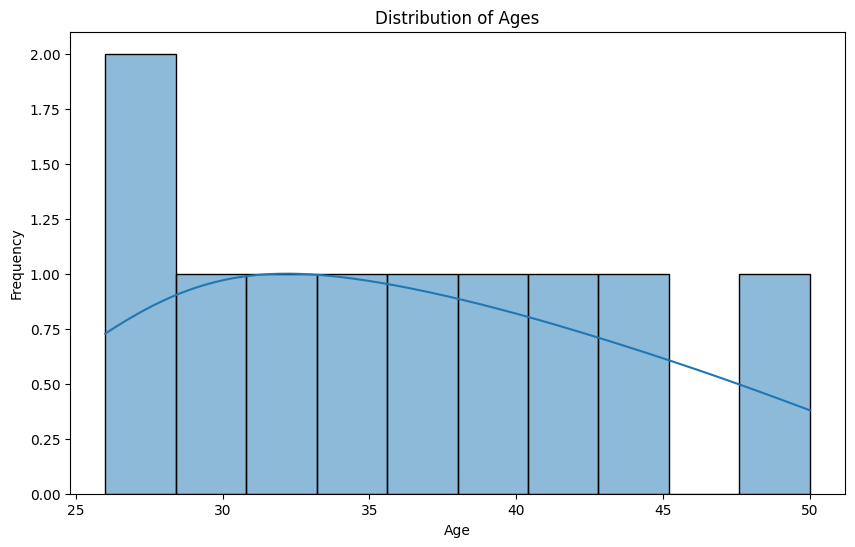

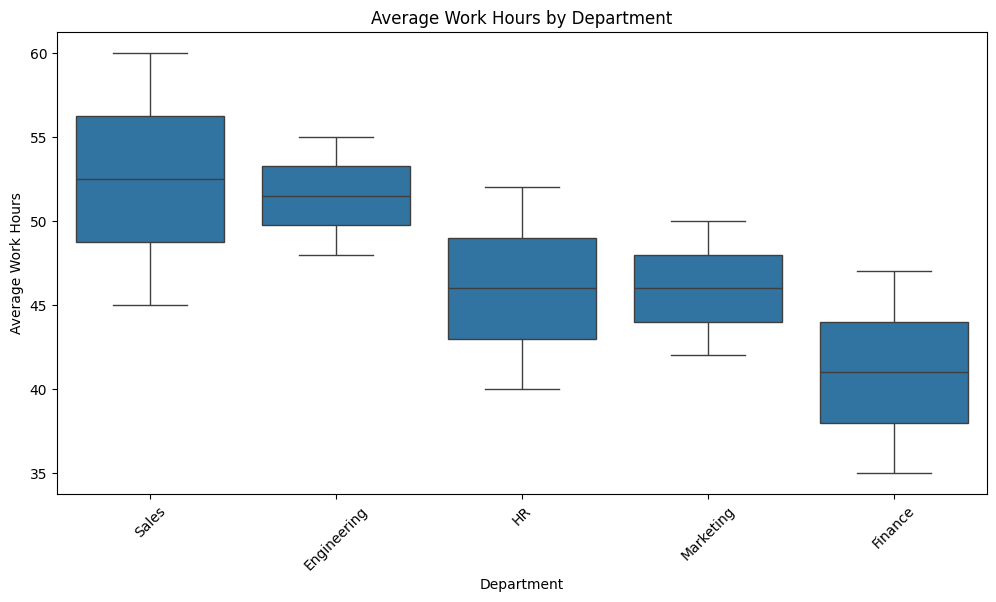

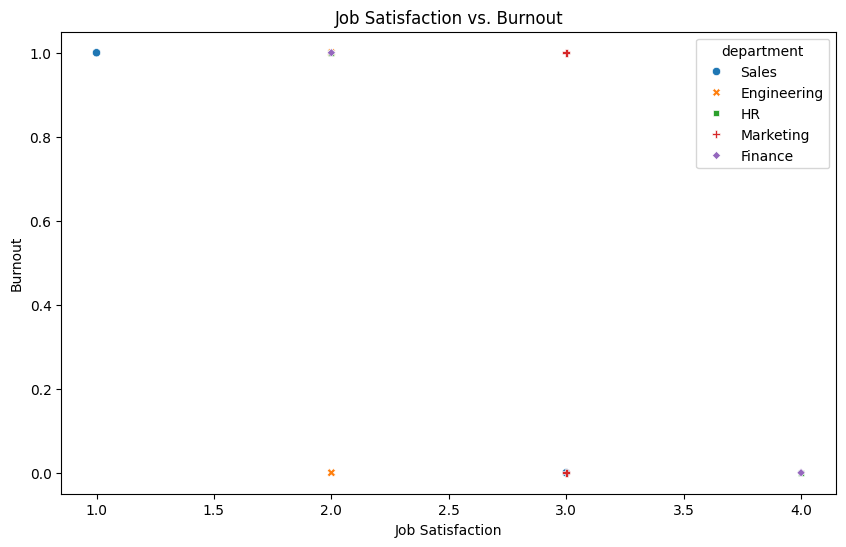


Average work hours by department:
department
Engineering    51.5
Finance        41.0
HR             46.0
Marketing      46.0
Sales          52.5
Name: avg_work_hours, dtype: float64

Correlation matrix:
                       employee_id       age  years_at_company  \
employee_id               1.000000  0.069786         -0.026874   
age                       0.069786  1.000000          0.986089   
years_at_company         -0.026874  0.986089          1.000000   
avg_work_hours            0.009964 -0.835602         -0.859740   
job_satisfaction         -0.303895  0.831077          0.862408   
number_of_projects        0.120605 -0.779232         -0.784340   
work_life_balance         0.166070  0.892384          0.854196   
mental_health_support    -0.284268  0.163663          0.214282   
burnout                   0.243709 -0.534522         -0.586632   

                       avg_work_hours  job_satisfaction  number_of_projects  \
employee_id                  0.009964         -0.303895 

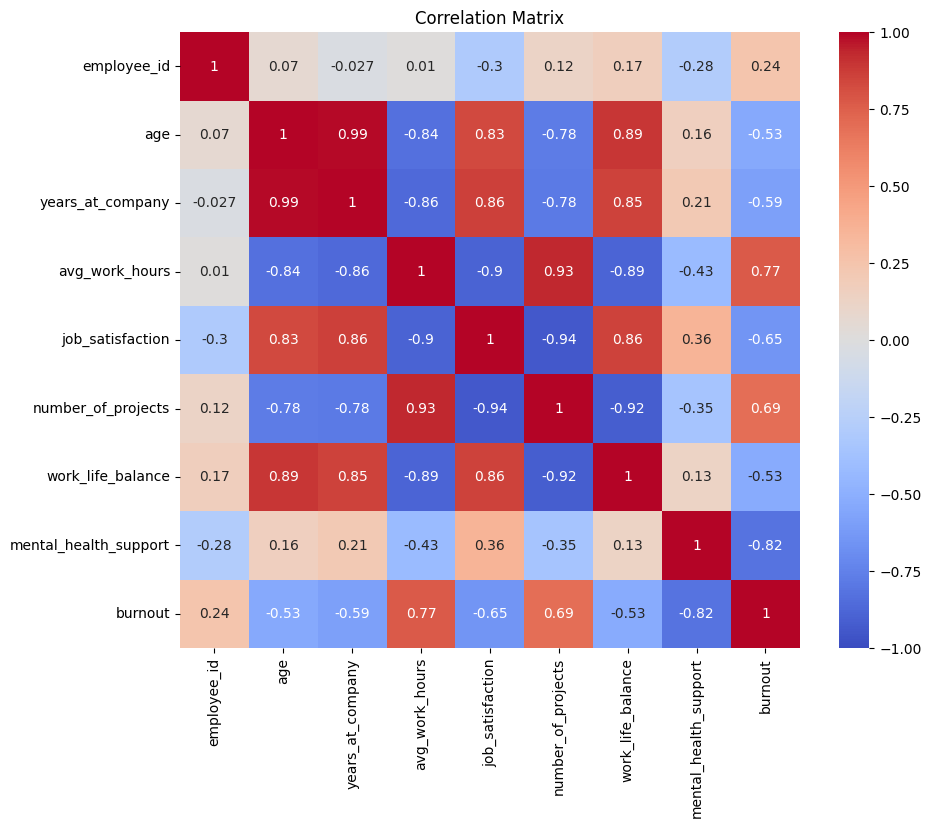

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'employee_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'age': [34, 28, 45, 38, 29, 50, 31, 26, 42, 37],
    'department': ['Sales', 'Engineering', 'HR', 'Marketing', 'Engineering', 'Finance', 'Sales', 'HR', 'Marketing', 'Finance'],
    'years_at_company': [5, 3, 10, 7, 4, 12, 3, 1, 8, 6],
    'avg_work_hours': [45, 55, 40, 50, 48, 35, 60, 52, 42, 47],
    'job_satisfaction': [3, 2, 4, 3, 2, 4, 1, 2, 3, 2],
    'number_of_projects': [5, 8, 4, 6, 7, 3, 9, 6, 5, 7],
    'work_life_balance': [2, 1, 3, 2, 1, 4, 1, 2, 3, 2],
    'mental_health_support': [1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
    'burnout': [0, 1, 0, 1, 0, 0, 1, 1, 0, 1]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('employee_data.csv', index=False)

# Load the data from CSV
df = pd.read_csv('employee_data.csv')

# 1. Exploratory Data Analysis (EDA)
print("First few rows of the DataFrame:")
print(df.head())

print("\nSummary statistics:")
print(df.describe(include='all'))

print("\nData types and missing values:")
print(df.info())

# 2. Data Cleaning
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Drop duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()

# Check for missing values
missing_values = df.isnull().sum()
print(f"\nMissing values in each column:\n{missing_values}")

# 3. Data Visualization
# Histogram of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot of average work hours by department (categorical x-axis)
plt.figure(figsize=(12, 6))
sns.boxplot(x='department', y='avg_work_hours', data=df)
plt.title('Average Work Hours by Department')
plt.xlabel('Department')
plt.ylabel('Average Work Hours')
plt.xticks(rotation=45)
plt.show()

# Scatter plot of job satisfaction vs. burnout
# Ensure job_satisfaction and burnout are numeric
plt.figure(figsize=(10, 6))
sns.scatterplot(x='job_satisfaction', y='burnout', data=df, hue='department', style='department')
plt.title('Job Satisfaction vs. Burnout')
plt.xlabel('Job Satisfaction')
plt.ylabel('Burnout')
plt.show()

# 4. Data Manipulation
# Calculate the average work hours by department
avg_work_hours_by_dept = df.groupby('department')['avg_work_hours'].mean()
print(f"\nAverage work hours by department:\n{avg_work_hours_by_dept}")

# 5. Data Analysis
# Ensure only numeric columns are used for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
